<a href="https://colab.research.google.com/github/grosa-isonlin3/lets-try-this-again/blob/main/housing_prices_preprocessing_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 Housing Prices Dataset - Data Preprocessing & EDA

## Objective:
This notebook will **guide you through the data cleaning process** and introduce you to the **Exploratory Data Analysis (EDA) cycle** using the **Housing Prices Dataset**.  

By the end of this notebook, you will understand:  

✅ The importance of **data preprocessing** before modeling  
✅ How to **handle missing values**  
✅ Encoding **categorical data** correctly  
✅ How to **normalize and scale features**  
✅ Identifying and **removing outliers**  
✅ Conducting **Exploratory Data Analysis (EDA)** to find patterns  

---

## **🔍 Why is Data Preprocessing Important?**  
Before using machine learning models, we must **clean and prepare data** to ensure accuracy.  
- **Real-world data is messy**: It may contain **missing values, duplicates, or inconsistent formats**.  
- **Data must be formatted properly**: Machine learning models require numerical inputs, so we must **convert categorical variables**.  
- **Feature scaling is needed**: Some features may have **large differences in scale**, impacting model performance.  



## 1️⃣ Loading the Dataset

### **📝 Step 1: Download the Dataset from Kaggle**  
1. **Go to the Kaggle link:** [House Prices Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)  
2. **Click "Download"** to get `train.csv`.  
3. **Upload the file to Colab** using the code below.

```python
import pandas as pd

# Load dataset into Pandas DataFrame
df = pd.read_csv("train.csv")

# Display first few rows
df.head()
```

### **🔍 What to Look For?**
- **What features are in the dataset?**  
- **Are there missing values?**  
- **Which columns are categorical vs. numerical?**  

```python
# Check dataset size and data types
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("
Column Data Types:
", df.dtypes)
```


In [ ]:
import pandas as pd

# Load dataset into Pandas DataFrame
df = pd.read_csv("_______")

# Display first few rows
df.______()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Check dataset size and data types
df.shape()
df.types()

NameError: name 'df' is not defined

## 2️⃣ Handling Missing Values

### **Why Do We Handle Missing Values?**
- Some machine learning models **cannot handle missing values**.  
- Missing values **introduce bias** if not treated properly.  
- Some missing data may provide **useful information** (e.g., missing basement means no basement exists).  

### **🔍 Checking for Missing Data**

```python
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values per column:", missing_values)
```

### **🛠 Ways to Handle Missing Values:**
✅ **Remove missing values** if they are very few → `df.dropna()`  
✅ **Fill missing values** based on domain knowledge:  
   - Use **median** for numerical values  
   - Use **mode** for categorical values  
   - Fill with **"None"** if missing means absence of a feature  

```python
# Example: Fill missing values in 'LotFrontage' with the median
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)

# Example: Fill missing categorical values in 'Alley' with "None"
df["Alley"].fillna("None", inplace=True)

# Check again for missing values
print("Missing values after handling: ", df.isnull().sum().sum())
```


In [ ]:
# Check for missing values
missing_values = df.______().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values per column:", missing_values)

Missing values per column: LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
print("Missing values before handling:\n", df.isnull().sum()[df.isnull().sum() > 0])

df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df["Alley"].fillna("None", inplace=True)

print("\nMissing values after handling:\n", df.isnull().sum()[df.isnull().sum() > 0])


Missing values before handling:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Missing values after handling:
 MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


<ipython-input-22-6bab5e21cb8d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
<ipython-input-22-6bab5e21cb8d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

## 3️⃣ Encoding Categorical Data

### **Why Do We Encode Categorical Data?**
Machine learning models **cannot process text** – categorical values must be converted into numbers.  

### **🔍 Checking Categorical Columns**
```python
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)
```

### **🛠 Encoding Techniques:**
✅ **One-Hot Encoding** – Creates binary columns for categories  
✅ **Label Encoding** – Assigns numerical labels (useful for ordinal categories)  

```python
# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Data after encoding:", df.head())
```


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)

df.head()

Categorical Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Apply One-Hot Encoding
categorical_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head(25)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=247)


## 4️⃣ Feature Scaling

### **Why Do We Scale Features?**
- Some features have **large numerical differences** (e.g., `LotArea` vs. `OverallQual`).  
- Scaling ensures **all features contribute equally** to the model.  

```python
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Apply Standard Scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())
```


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Apply Standard Scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.220875 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.460320 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084636  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.447940 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.641972  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0   1.050994      0.878668    0.510015    0.575425  ...           False   
1   0.156734     -0.429577   -0.572835    1.171992  ...           False   
2   0.984752      0.830215    0.322174    0.092907  ...           False   
3  -1.863632     -0.720298   -0.572835   -0.499274  ...           False   
4   0.951632      0.733308    1.360826    0.463568  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         Fals

## 5️⃣ Detecting & Removing Outliers

### **Why Remove Outliers?**
- Outliers can **skew predictions** and impact model accuracy.  
- They can be caused by **data entry errors** or represent **rare cases**.  

### **🔍 Using the Interquartile Range (IQR) Method**

```python
import numpy as np

# Select only numerical columns
numeric_cols = df.select_dtypes(include=["number"]).columns
df_numeric = df[numeric_cols]  # Create a separate DataFrame for IQR computation

# Compute IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df_numeric >= lower_bound) & (df_numeric <= upper_bound)].dropna()

print("📉 Dataset size before and after outlier removal:")
print("Original dataset size:", df.shape[0])
print("After outlier removal:", df_cleaned.shape[0])

```


In [ ]:
import numpy as np

# Select only numerical columns
numeric_cols = df.select_dtypes(include=["number"]).columns
df_numeric = df[numeric_cols]  # Create a separate DataFrame for IQR computation

# Compute IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df_numeric >= lower_bound) & (df_numeric <= upper_bound)].dropna()

print("📉 Dataset size before and after outlier removal:")
print("Original dataset size:", df.shape[0])
print("After outlier removal:", df_cleaned.shape[0])

📉 Dataset size before and after outlier removal:
Original dataset size: 1460
After outlier removal: 0


## 6️⃣ Exploratory Data Analysis (EDA)

### **Why Do We Perform EDA?**
EDA helps us **understand trends, relationships, and patterns** in the dataset.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Histogram:  Distribution of Sales Prices
plt.figure(figsize=(8, 5))
sns.histplot(df["____"], bins=30, kde=True)
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

KeyError: '____'

<Figure size 800x500 with 0 Axes>

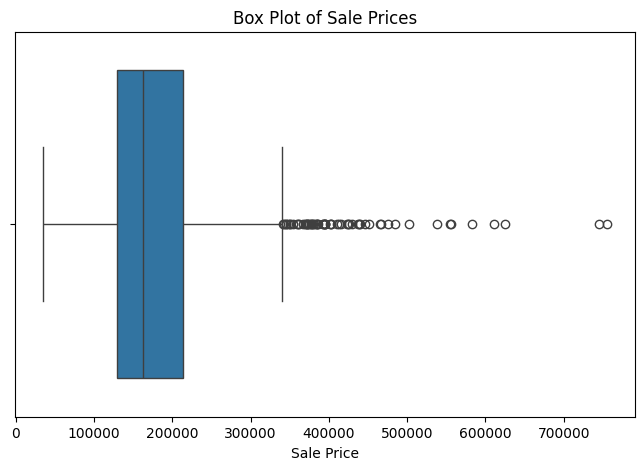

In [ ]:
#Box Plot: Outliers in Sales Price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["____"])
plt.title("Box Plot of Sale Prices")
plt.xlabel("Sale Price")
plt.show()

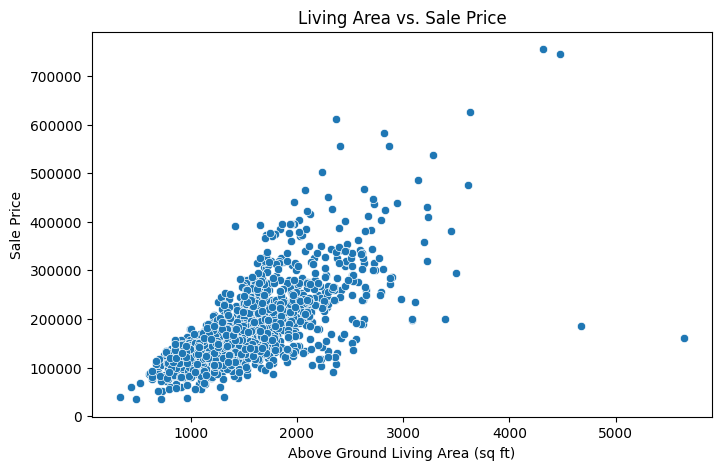

In [ ]:
#Scatter Plot: Living Area vs. Sales Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["_____"], y=df["_____"])
plt.title("Living Area vs. Sale Price")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()

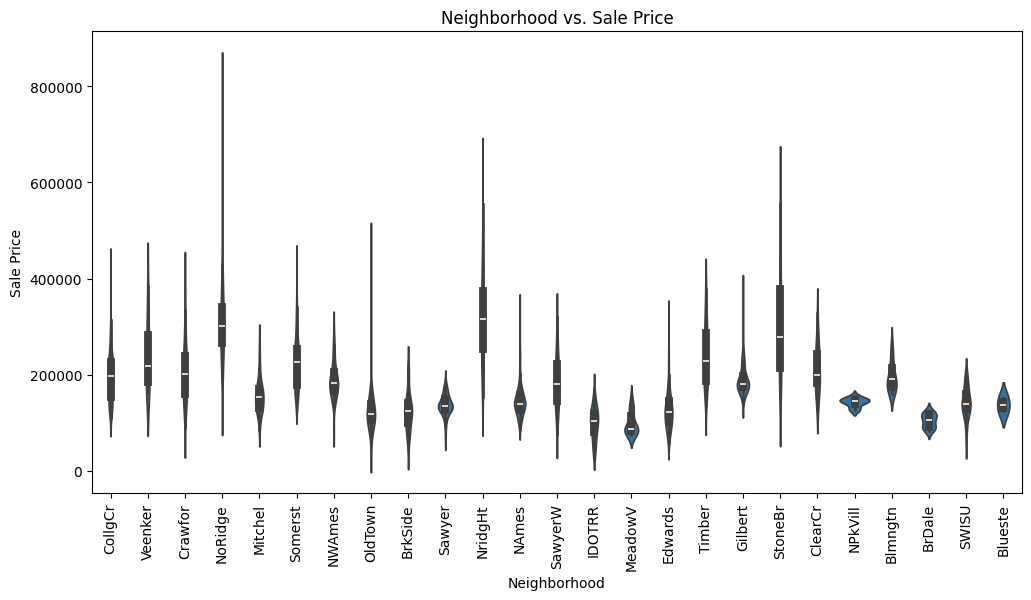

In [ ]:
#Violin Plot: Neighbourhood vs. Sales Price
plt.figure(figsize=(12, 6))
sns.violinplot(x=df["_____"], y=df["____"])
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.title("Neighborhood vs. Sale Price")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.show()


<ipython-input-50-323f50a5fa85>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="viridis")


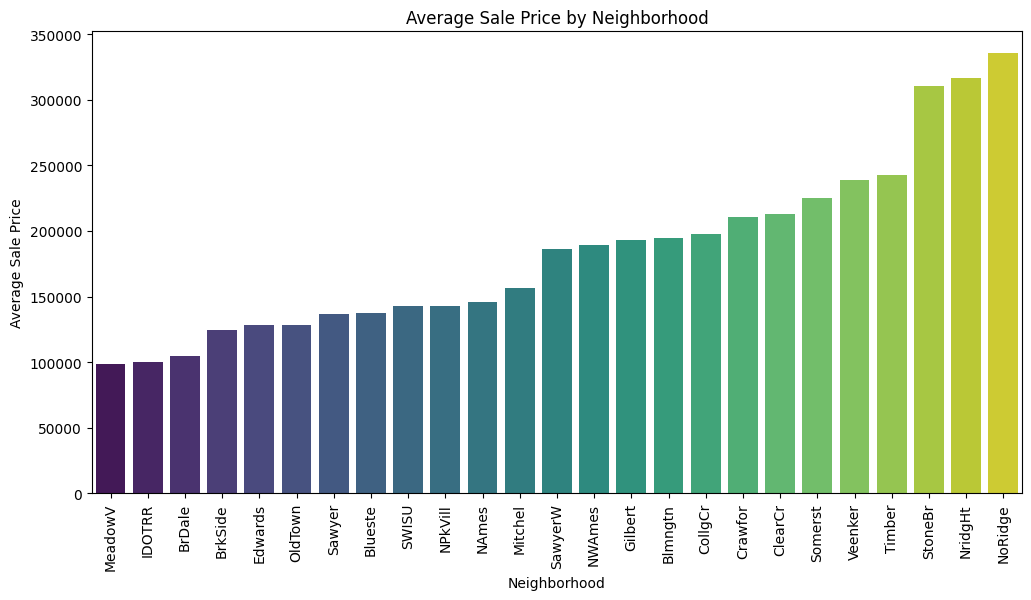

In [ ]:
# Compute average sale price per neighborhood
avg_prices = df.groupby("____")["____"].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="viridis")

plt.xticks(rotation=90)  # Rotate x labels for readability
plt.title("Average Sale Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Sale Price")
plt.show()